In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [114]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv('bigdatamart_train.csv')

In [42]:
df_test = pd.read_csv('bigdatamart_test.csv')

In [43]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [45]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [47]:
df.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [48]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [49]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())  #imputed with median age

In [50]:
from sklearn.base import TransformerMixin

class SeriesImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        If the Series is of dtype Object, then impute with the most frequent object.
        If the Series is not of dtype Object, then impute with the mean.  

        """
    def fit(self, X, y=None):
        if   X.dtype == np.dtype('O'): self.fill = X.value_counts().index[0]
        else                            : self.fill = X.mean()
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [51]:
s1 = pd.Series(list(df.Outlet_Size))
a  = SeriesImputer()   # Initialize the imputer
a.fit(s1)              # Fit the imputer
s2 = a.transform(s1)

In [52]:
df['Outlet_Size'] = s2

In [53]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### EDA 

In [54]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [154]:
#defining Function for plotting Bar Graph
def plot_graph(col_list):
    for col in col_list:
        ax = df.groupby([col]).sum().plot(y = 'Item_Outlet_Sales', kind = 'bar', figsize = (14,10))
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        plt.show()

In [157]:
col_list = ['Item_Fat_Content','Item_Type','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']

#### Plotting the Relation of Various Attributes with the Item_Outlet_Sales

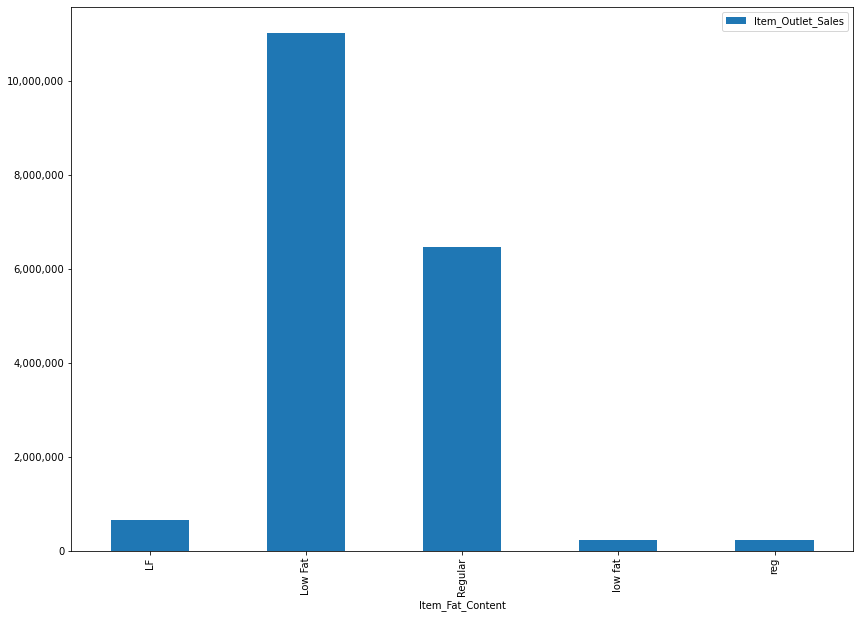

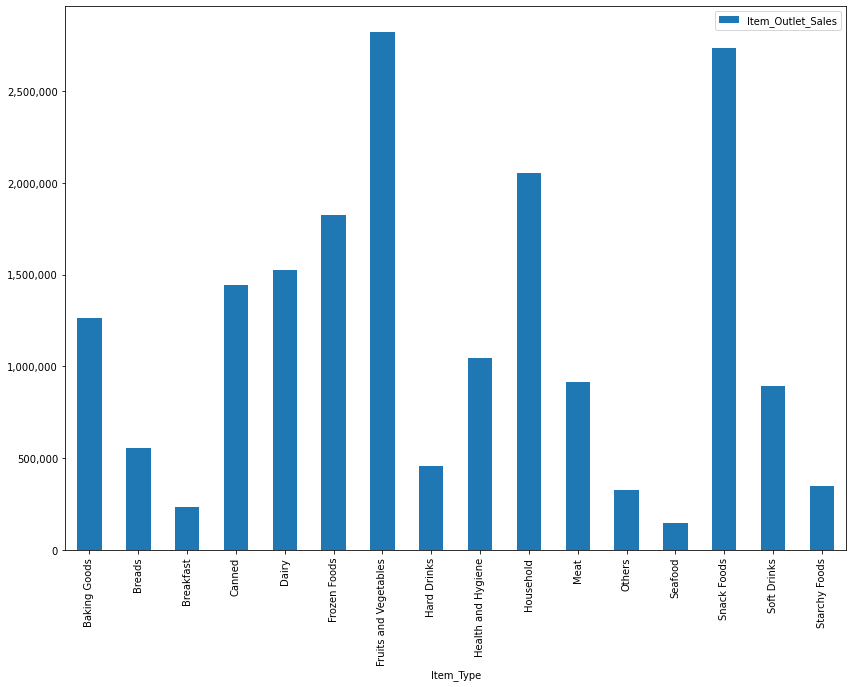

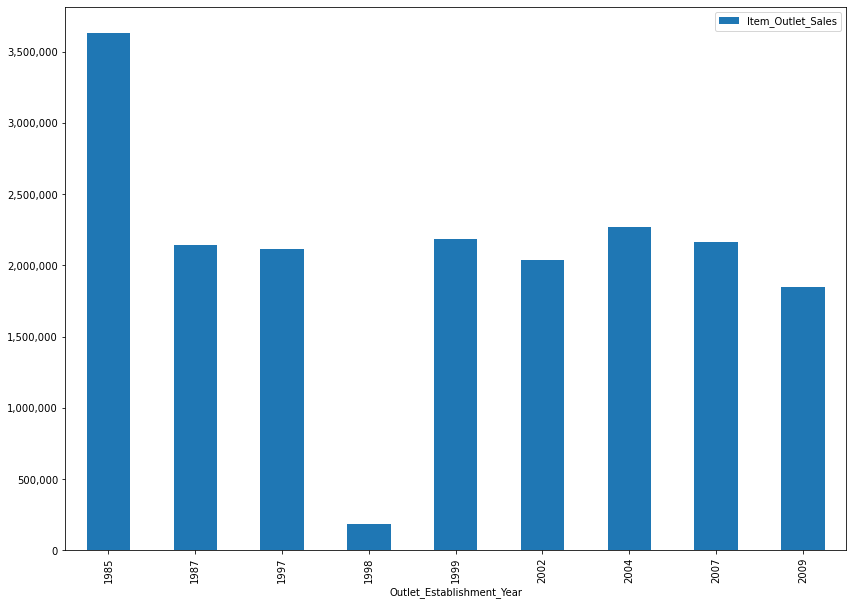

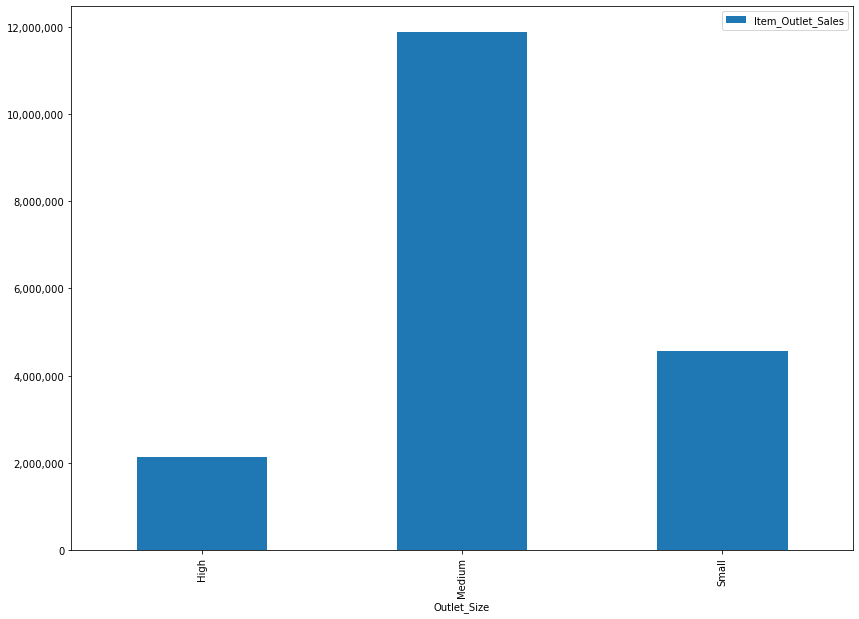

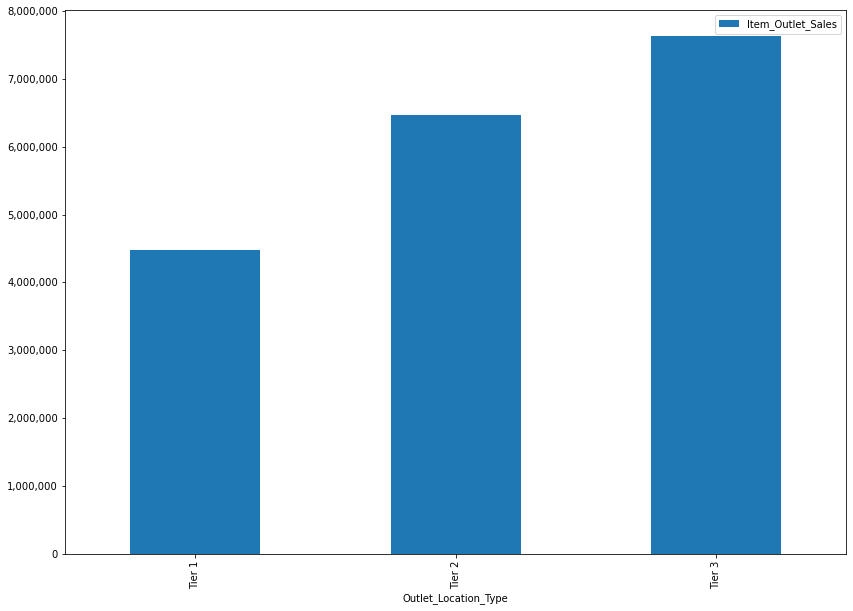

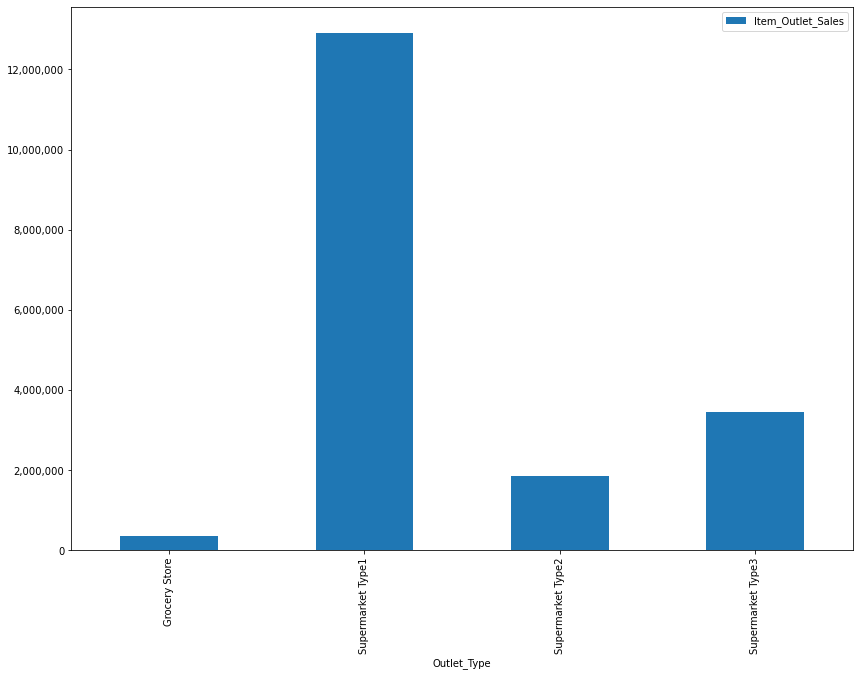

In [158]:
plot_graph(col_list)

From the Plots we can find Various Information such as:-
1. Highest Sale in Fruits and Vegetables / Lowest in SeaFood
2. Medium Outlet Size is Better
3. SuperMarket Type1 has better performance
4. People buy mostly Low-Fat products. 
5. Tier 3 Location is better for BigData Mart...... etc

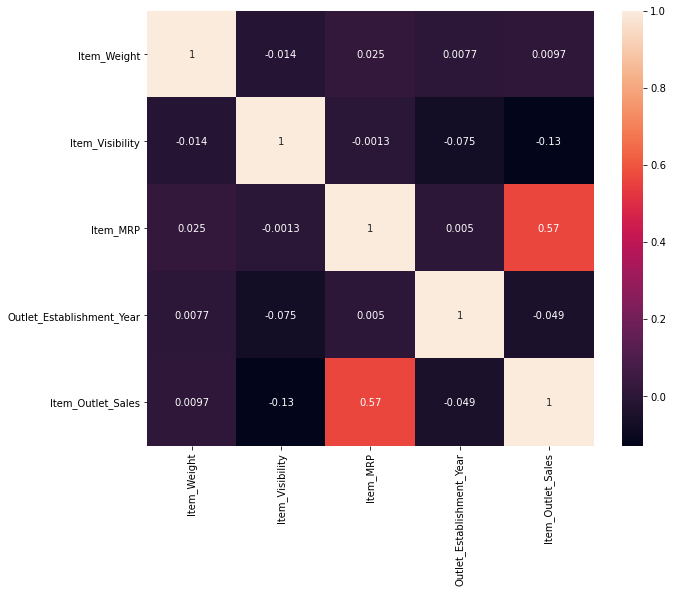

In [55]:
#finding the correlation using heat map.
ax,fig = plt.subplots(figsize=(10,8))
data= df.corr()
sns.heatmap(data, annot=True)
plt.show()

In [60]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [73]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [65]:
mart_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


### Preprocessing 

In [78]:
cols1 = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
cols2 = ['Item_Weight', 'Item_Visibility','Item_MRP','Item_Outlet_Sales']
mart_DT_cat = df[cols1]
mart_DT_num = df[cols2]

In [79]:
mart_DT_cat.nunique()

Item_Fat_Content         5
Item_Type               16
Outlet_Identifier       10
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64

In [80]:
lbl=LabelEncoder()
for col in mart_DT_cat.columns:
    mart_DT_cat[col] = lbl.fit_transform(mart_DT_cat[col])

In [96]:
mart_DT = mart_DT_cat
mart_DT = pd.concat((mart_DT,mart_DT_num),axis=1)

In [98]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [97]:
mart_DT.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,1,4,9,1,0,1,9.30,0.016047,249.8092,3735.1380
1,2,14,3,1,2,2,5.92,0.019278,48.2692,443.4228
2,1,10,9,1,0,1,17.50,0.016760,141.6180,2097.2700
3,2,6,0,1,2,0,19.20,0.000000,182.0950,732.3800
4,1,9,1,0,2,1,8.93,0.000000,53.8614,994.7052


In [110]:
y = mart_DT['Item_Outlet_Sales'].values   #the target column

In [111]:
# The variables array X 
mart_ml= mart_DT.drop(['Item_Outlet_Sales'],1)
X = mart_ml.values
mart_ml.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP
0,1,4,9,1,0,1,9.30,0.016047,249.8092
1,2,14,3,1,2,2,5.92,0.019278,48.2692
2,1,10,9,1,0,1,17.50,0.016760,141.6180
3,2,6,0,1,2,0,19.20,0.000000,182.0950
4,1,9,1,0,2,1,8.93,0.000000,53.8614


### Training and Validation Test

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=20)  # Dividing Train and Test

In [119]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5966, 9) (2557, 9) (5966,) (2557,)


In [115]:
# model initialization
regression_model = LinearRegression()
# fit the data(train the model)
regression_model.fit(X_train, y_train)
# predict
y_predicted = regression_model.predict(X_test)

In [116]:
# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
r2

0.5098895660546274

In [134]:
Results = pd.DataFrame({'Actual_Item_Outlet_Sales':y_test,'Predicted_Values':y_predicted})

In [137]:
Results

,Actual_Item_Outlet_Sales,Predicted_Values
0,998.7000,1188.023662
1,4122.6336,3247.473386
2,149.8050,597.802968
3,2680.5108,1945.450903
4,3478.8050,2651.315287
...,...,...
2552,1886.8772,2237.868067
2553,1286.3256,1105.348896
2554,2527.3768,3311.538940
2555,2807.0128,2319.235616


The Values are quite nearby even though not Accurate

### Preprocessing for Test Data also

In [100]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [105]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [106]:
df_test = df_test.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [107]:
cols1 = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
cols2 = ['Item_Weight', 'Item_Visibility','Item_MRP']
test_DT_cat = df_test[cols1]
test_DT_num = df_test[cols2]
lbl=LabelEncoder()
for col in test_DT_cat.columns:
    test_DT_cat[col] = lbl.fit_transform(test_DT_cat[col])
test_DT = test_DT_cat
test_DT = pd.concat((test_DT,test_DT_num),axis=1)

In [108]:
test_DT

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP
0,1,13,4,1,0,0,20.750,0.007565,107.8622
5,2,6,3,2,0,0,9.800,0.063817,117.1492
6,2,0,1,1,2,1,19.350,0.082602,50.1034
13,1,1,4,1,0,0,4.785,0.092738,122.3098
14,0,7,0,0,2,0,16.750,0.021206,52.0298
...,...,...,...,...,...,...,...,...,...
5673,1,13,1,1,2,1,7.070,0.094053,116.0834
5674,1,7,3,2,0,0,15.700,0.030704,43.2770
5675,2,13,4,1,0,0,13.000,0.070411,63.4484
5676,2,13,3,2,0,0,10.500,0.013496,141.3154


In [138]:
regression_model.predict(test_DT)

array([ 902.27905073,  648.45832923,  210.66881895, ...,  165.77991469,
       1070.06413219, 2018.35841447])

In [139]:
test_DT["Predicted_Item_Sales"] = regression_model.predict(test_DT)

### Saving the Model 

In [143]:
import joblib

# Saving the model as a pickle in a file
joblib.dump(regression_model,"mart_data.pkl")

['mart_data.pkl']